# Lab 5: Regression
## Exercise 0: Have a go as regression with some toy data
have a go at sciKit-Learn's example and try to interpret the values

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import plotly.express as px
from matplotlib.legend_handler import HandlerLine2D
import scipy as sp
import statsmodels.api as sm

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


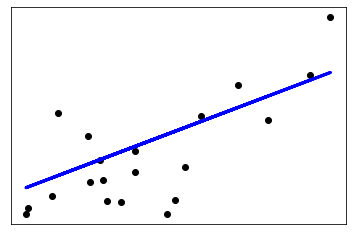

In [10]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercise 1: Linear regression to analyse relationships between house prices and other variables
### (1) Get the data

In [11]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### (2) Find your variables

In [12]:
GrLivArea = train['GrLivArea']
SalePrice = train['SalePrice']

### (3) Check out your variables
Create a scatterplot to see if there's appears to be a relationship between these two variables. Tips: Use transparency and zoom in on the details by removing the outliers from the scatterplot using a Pandas filter, setting the scale of the axes or using an interactive plot. Does there appear to be a relationship? Also, plot the distributions (histgrams and/or box plots).

Text(0, 0.5, 'Sale Price (USD)')

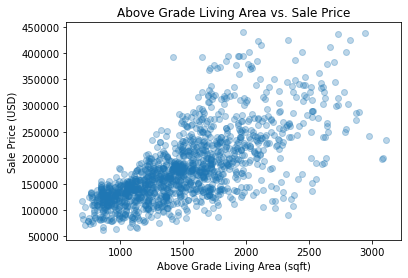

In [13]:
# remove the outliers from the scatterplot
q_low = train["SalePrice"].quantile(0.01)
q_hi  = train["SalePrice"].quantile(0.99)
train_filtered = train[(train["SalePrice"] < q_hi) & (train["SalePrice"] > q_low)]

q_low = train["GrLivArea"].quantile(0.01)
q_hi  = train["GrLivArea"].quantile(0.99)
train_filtered = train_filtered[(train_filtered["GrLivArea"] < q_hi) & (train_filtered["GrLivArea"] > q_low)]


GrLivArea_filtered = train_filtered['GrLivArea']
SalePrice_filtered = train_filtered['SalePrice']

# scatter plot
plt.scatter(GrLivArea_filtered, SalePrice_filtered, alpha = 0.3)
plt.title('Above Grade Living Area vs. Sale Price')
plt.xlabel('Above Grade Living Area (sqft)')
plt.ylabel('Sale Price (USD)')

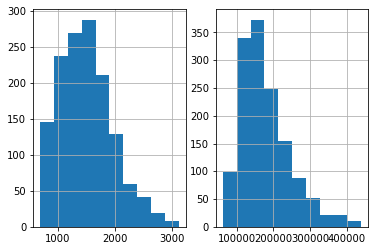

In [14]:
# plot as histogram
fig, axes = plt.subplots(1, 2)
GrLivArea_filtered.hist(ax=axes[0]);
SalePrice_filtered.hist(ax=axes[1]);

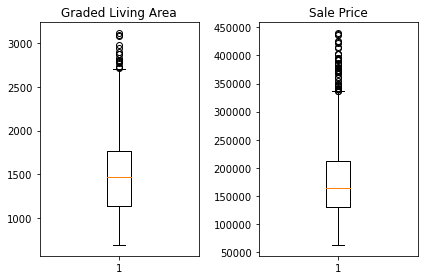

In [15]:
# box plot
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(GrLivArea_filtered)
axs[0].set_title('Graded Living Area')

axs[1].boxplot(SalePrice_filtered)
axs[1].set_title('Sale Price')

# fixes plots overlapping
plt.tight_layout(w_pad=1.5)

### (4) build a simple linear regression model
Build a regression model that predicts price from floor area in order to see how the variation in price can be explained by floor area. Determine your independent variable (x) and dependent variable (y), create a new linear model object and use its fit() function to fit the model and extract the two parameters (intersept and slope). Interpret these - what do they tell you about the relationship between floor area and price?

In [16]:
# Split the data into training/testing sets
GrLivArea_train = GrLivArea[:-20].values.reshape(-1, 1)
GrLivArea_test = GrLivArea[-20:].values.reshape(-1, 1)

# Split the targets into training/testing sets
SalePrice_train = SalePrice[:-20].values.reshape(-1, 1)
SalePrice_test = SalePrice[-20:].values.reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(GrLivArea_train, SalePrice_train)

# The coefficients
print('Coefficient: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

Coefficient: 
 [[107.47761769]]
intercept: 
 [18065.75256506]


the coefficient is very large, indicating a high dependency between floor area and price

### (5) Quantify the variation in price due to floor area
Use the score( ) function to get the R2 value. How much of the variation is explained by floor area?

In [17]:
r2 = regr.score(GrLivArea_test, SalePrice_test)
print ('The R2 score is: ' + str(r2))

The R2 score is: 0.4306843381150913


### (6) Predict price from floor area using this model and compare with observed
Add a new column of predicted prices using LinearRegression's predict() function. Plot a scatterplot with the floorspace vs price and floorspace vs predicted price on the same axis with different coloured dots. How's the model look?

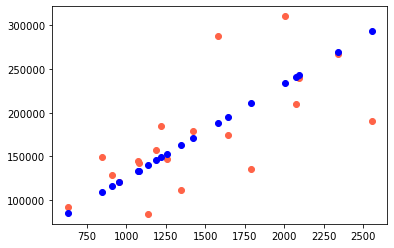

In [18]:
# Make column of predicted prices
train['SalePrice_pred']= regr.predict(GrLivArea.values.reshape(-1, 1))

# Make predictions using the testing set
SalePrice_pred = regr.predict(GrLivArea_test)

# Plot floorspace vs price
plt.scatter(GrLivArea_test, SalePrice_test,  color='tomato')

#plot floorspace vs. predicted price
plt.scatter(GrLivArea_test, SalePrice_pred,color='blue')


plt.show()

### (7) Calculate Residuals
Add a new column of residuals (observed minus predicted values. Look at the means and distributions and comment on the effect size - does it predict within a reasonable margin?

In [19]:
train['Residuals']=train['SalePrice']-train['SalePrice_pred']

train['SalePrice'].describe(), train['SalePrice_pred'].describe()

(count      1460.000000
 mean     180921.195890
 std       79442.502883
 min       34900.000000
 25%      129975.000000
 50%      163000.000000
 75%      214000.000000
 max      755000.000000
 Name: SalePrice, dtype: float64,
 count      1460.000000
 mean     180944.180583
 std       56477.379751
 min       53963.276872
 25%      139461.721741
 50%      175412.984857
 75%      209026.609788
 max      624454.471549
 Name: SalePrice_pred, dtype: float64)

the model predicts within a resonable margin of error.

## Mutiple linear regression
### (1) Find the top correlated numerical variables
Find the top correlations between the price and the numerical variables.

In [20]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10

SalePrice         1.000000
OverallQual       0.790982
SalePrice_pred    0.708624
GrLivArea         0.708624
Residuals         0.703275
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
Name: SalePrice, dtype: float64 



### (2) Choose another variable to add to the model
 Choose another variable to find to account for more of the variation. Choose a highly correlated variable but check it's not too correlated to your floor area variable (correlation of <0.5 should be OK). Also check that it seems a reasonable predictor variable.

In [21]:
# choose OverallQual but first check to see if its not too correlated to floor area
print (corr['OverallQual'].sort_values(ascending=False)[:10], '\n') #top 10

OverallQual       1.000000
SalePrice         0.790982
GarageCars        0.600671
SalePrice_pred    0.593007
GrLivArea         0.593007
YearBuilt         0.572323
GarageArea        0.562022
YearRemodAdd      0.550684
FullBath          0.550600
GarageYrBlt       0.547766
Name: OverallQual, dtype: float64 



### (3) Create a new model with two independent variables

Coefficients: 
 [[45532.9327866]]
Mean squared error: 1089915281.73
Coefficient of determination: 0.71


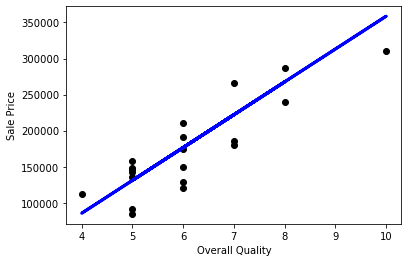

In [26]:
# Get the variables
OverallQual = train['OverallQual']
SalePrice = train['SalePrice']

# Split the data into training/testing sets
OverallQual_train = OverallQual[:-20].values.reshape(-1, 1)
OverallQual_test = OverallQual[-20:].values.reshape(-1, 1)

# Split the targets into training/testing sets
SalePrice_train = SalePrice[:-20].values.reshape(-1, 1)
SalePrice_test = SalePrice[-20:].values.reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(OverallQual_train, SalePrice_train)

# Make predictions using the testing set
SalePrice_pred = regr.predict(OverallQual_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(SalePrice_test, SalePrice_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(SalePrice_test, SalePrice_pred))

# Plot outputs
plt.scatter(OverallQual_test, SalePrice_test,  color='black')
plt.plot(OverallQual_test, SalePrice_pred, color='blue', linewidth=3)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

plt.show()

### (4) Check the R2
Does the model capture more of the variation?

In [27]:
r2 = regr.score(OverallQual_test, SalePrice_test)
print ('The R2 score is: ' + str(r2))

The R2 score is: 0.7062293847861221


### (5) Check the Parameters
Try to interpret the parameters. There are two slopes now, one for each variable. Also, note that these variables are in different units, so this affects the interpretation of these parameters (they can't be compared to each other unless you normalise the variables). These are tricky to interpret because they interact with each other.

### (6) Study Residuals
See how the residuals vary by some category e.g. Neighborhood. This will tell which types of house are poorly modelled and this may give some clues for our analysis. For example, we might model some subsets separately or exclude some subset for our analysis.

# Exercise 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics
## Simple Linear Regression
### (1) Load the Data

In [3]:
crime = pd.read_csv('censusCrimeClean.csv')
crime.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### (2) Choose two columns and save as variables

In [4]:
medincome = crime['medIncome'].values
violentcrimesperpop = crime['ViolentCrimesPerPop'].values

### (3) Choose suitable variables

### (4) Fit a model and inspect the parameters

In [12]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(medincome, violentcrimesperpop)
print('slope: ' + str(slope))
print('intercept: ' + str(intercept))
print('r-value: ' + str(r_value))
print('p-value: ' + str(p_value))
print('standard error: ' + str(std_err))

slope: -0.47208549295836494
intercept: 0.408460041007753
r-value: -0.4242206167261259
p-value: 6.334424808054381e-88
standard error: 0.022578802568586777


### (5) Calculate a regression line

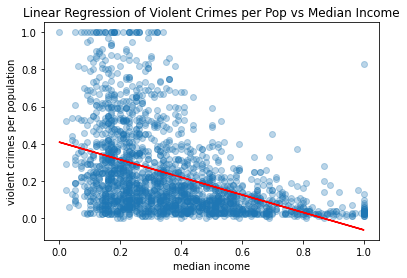

In [41]:
modelledDependent = np.polyval(medincome, violentcrimesperpop)

plt.scatter(medincome, violentcrimesperpop, alpha=0.3)
plt.plot(medincome, intercept+slope*medincome, 'r')
plt.xlabel('median income');
plt.ylabel('violent crimes per population');
plt.title("Linear Regression of Violent Crimes per Pop vs Median Income");

### (6) Comment on the model

## Multiple linear regression
### (1) build a multiple linear regression model

In [55]:
model = sm.OLS(violentcrimesperpop, medincome)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.220
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              563.5
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                   6.50e-110
Time:                        14:48:03   Log-Likelihood:                         -388.47
No. Observations:                1994   AIC:                                      778.9
Df Residuals:                    1993   BIC:                                      784.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------